In [2]:
from gz_import import *
from gz_mainlib import *
from gz_plotlib import *
from gz_dwnllib import *
from gz_rwlib import *
from gz_const import *

mainver()
plotver()
rwver()
dwnlver()

Main ver: 67
Plot ver: 67
RW ver: 67
Download ver: 67


In [3]:
t1 = datetime.date(2020,1,1)
t2 = datetime.date(2021,1,1)
now = datetime.datetime.today().date()

#df_instruments = pd.read_hdf('instruments.h5', 'instruments')

df_instruments = pd.read_hdf('dat.h5', 'df_instruments')

yfinfo = hdf5_readjson('dat.h5', 'yfinfo')

l_ticsectorindustry = [(k,v['sector'], v['industry'], v['longBusinessSummary']) for (k,v) in yfinfo.items() if 'sector' in v]
df_sector = pd.DataFrame(l_ticsectorindustry, columns=['tic', 'sector', 'industry', 'longBusinessSummary'])

l_sectors = unic_value(df_sector, 'sector')
l_industries = unic_value(df_sector, 'industry')

df_sector_tics = groupbycol(df_sector, 'sector', 'tic')
df_industry_tics = groupbycol(df_sector, 'industry', 'tic')
df_sector_industries = groupbycol(df_sector, 'sector', 'industry')

d_sector_tics = df_sector_tics.set_index('sector').T.to_dict('records')[0] #'list')
d_industry_tics = df_industry_tics.set_index('industry').T.to_dict('records')[0]
d_sector_industries = df_sector_industries.set_index('sector').T.to_dict('records')[0]

#all_tics = sorted(df_instruments['ticker'].tolist())

all_ru_ticks = sorted(df_instruments[df_instruments['currency'] == 'RUB']['ticker'].tolist())
all_us_ticks = sorted(df_instruments[df_instruments['currency'] == 'USD']['ticker'].tolist())

ru_tics_nodata = ['GRNT', 'MSST', 'PRFN', 'RUAL_old', 'TORS',
                 'ENPL', 'RUSP', 'FTRE', 'OBUV', 'TRCN', 'DASB', 'PRTK', 'ALNU', 'VZRZP']

ru_tics_new = ['FIXP', 'ENPG', 'GLTR', 'FLOT', 'ETLN', 'MDMG', 'MAIL', 
               'OKEY', 'OZON', 'SMLT', 'POGR', 'ORUP', 'SGZH']


l_reits_forshort = ['AMT', 'ARE', 'BXP', 'MAC', 'O', 'SPG', 'VTR', 'WELL']
l_utilities_forshort = ['CNP', 'D', 'ED', 'EIX', 'EXC', 'NEE', 'NRG', 'PCG', 'PPL', 'SO']
l_fooddistr_forshort = ['CHEF', 'PFGC', 'USFD']
l_oilgas_forshort = ['APA', 'BKR', 'CHX', 'CLR', 'COP', 'CVX', 'DVN', 'EOG', 'EQT', 'ET', 
                     'ETRN', 'HAL', 'KMI', 'MPC', 'OII', 'OKE', 'OVV', 'OXY', 'PBF', 'PSX', 
                     'PUMP', 'REGI', 'RRC', 'SLB', 'SWN', 'VLO', 'WMB', 'XOM']

ru_tics_temp = all_ru_ticks + ru_tics_nodata + ru_tics_new

ru_tics_download = set(ru_tics_temp) ^ set(ru_tics_nodata + ru_tics_new)

list_dfinstr_usticsdownloads = df_instruments[df_instruments['ticker'].isin(us_tics_download)]['ticker'].tolist()
list_usticsdiff= set(us_tics_download) ^ set(list_dfinstr_usticsdownloads)
list_usticsdiff

{'JOYY', 'JP'}

In [3]:
dfy = pd.read_hdf('dat.h5', 'dfy')
dfm = pd.read_hdf('dat.h5', 'dfm')
dfy_corr = pd.read_hdf('dat.h5', 'dfy_corr')
dfm_corr = pd.read_hdf('dat.h5', 'dfm_corr')
dfy_doclh = pd.read_hdf('dat.h5', 'dfy_doclh')
dfm_doclh = pd.read_hdf('dat.h5', 'dfm_doclh')


In [14]:
for x in ['APA']:
    a = atr(dfy_doclh, x)[['date', x+'_ATR', x+'_close', x+'_low', x+'_high']] #.reset_index()
                           
    dclo = a[x+'_close'].diff()
    dhig = a[x+'_high'].diff()
    dlow = a[x+'_low'].diff()                           
                           
    dabsmax = np.maximum(np.maximum(np.abs(dclo), np.abs(dhig)), np.abs(dlow))        
 
    
    a[x+'_dclose'] = a[x+'_close'].diff()
    a[x+'_dhigh'] = a[x+'_high'].diff()
    a[x+'_dlow'] = a[x+'_low'].diff()
    a[x+'_absmax'] = a[x+'_low'].diff()
    
    a[x+'_absmax'] = dabsmax
    
    a.dropna(inplace=True)
    a.reset_index(inplace=True, drop=True)
    
    

In [24]:
#a.dropna(inplace=True)

In [15]:
a[a['date'] > pd.Timestamp(datetime.date(2020,3,10))]


,date,APA_ATR,APA_close,APA_low,APA_high,APA_dclose,APA_dhigh,APA_dlow,APA_absmax
33,2020-03-11,2.282851,8.250000,7.950000,10.110000,-2.540000,-1.390000,-1.450000,2.540000
34,2020-03-12,2.241219,7.760000,6.600000,8.300000,-0.490000,-1.809999,-1.350000,1.809999
35,2020-03-13,2.198274,8.070000,6.950000,8.590000,0.309999,0.290000,0.350000,0.350000
36,2020-03-16,2.228398,5.460000,5.450000,6.920000,-2.610000,-1.670000,-1.500000,2.610000
37,2020-03-17,2.162798,4.460000,4.400000,5.710000,-1.000000,-1.210000,-1.050000,1.210000
...,...,...,...,...,...,...,...,...,...
357,2021-06-23,0.944751,21.900000,21.879999,22.690001,-0.050001,0.540001,0.150000,0.540001
358,2021-06-24,0.931555,22.260000,21.540001,22.299999,0.360001,-0.390001,-0.339998,0.390001
359,2021-06-25,0.910015,22.200001,21.809999,22.440001,-0.059999,0.140001,0.269999,0.269999
360,2021-06-28,0.936443,21.030001,20.920000,22.090000,-1.170000,-0.350000,-0.889999,1.170000


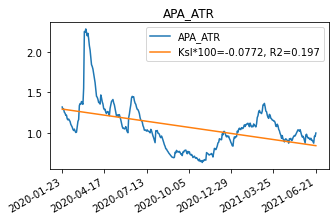

In [6]:
plot_LR_tics_d(a, 'APA_ATR')